In [1]:
import pandas as pd

data = pd.read_csv('avito_wo_nan.csv')
data = data.drop(['Unnamed: 0', 'Руль', 'Цвет', 'Объём двигателя'], axis=1)
data_new = data.drop(['VIN или номер кузова', 'Ссылка'], axis=1)

data_dummies = pd.get_dummies(data=data_new, columns=['Марка', 'Модель', 'Тип кузова',
                                                      'Привод', 'Тип двигателя',
                                                      'Состояние', 'Коробка передач'])

X = data_dummies.drop(['Цена'], axis=1).values
y = data_dummies['Цена'].values

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X) # fit does nothing.
transformer
Normalizer(copy=True, norm='l2')
transformer.transform(X)

array([[1.25614805e-02, 6.24949277e-06, 2.12482754e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.88006923e-02, 2.43152428e-05, 1.09418593e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27951193e-02, 1.27377992e-05, 1.34383781e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.19753261e-02, 1.19039026e-05, 9.70168066e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07128054e-02, 2.05892698e-05, 1.67802549e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38100609e-02, 2.06120312e-05, 1.58712641e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [3]:
import sklearn.gradientboosting

ModuleNotFoundError: No module named 'sklearn.gradientboosting'

In [4]:
import xgboost

In [10]:
import numpy as np

In [19]:
%%time

eta_ = np.linspace(0.01, 0.2, 5)
subsample_ = np.linspace(0.5, 1, 5)
max_deth_ = np.linspace(3, 8, 5)



reg = xgboost.XGBRegressor(n_estimators=1000, tree_method='gpu_hist')

from sklearn.model_selection import GridSearchCV

param_grid = {"eta": eta_, "subsample": subsample_, "max_deth": max_deth_}

grid = GridSearchCV(reg, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

CPU times: user 43min 20s, sys: 15min 19s, total: 58min 39s
Wall time: 58min 48s


In [20]:
grid.best_score_

0.9176107663680722

In [21]:
grid.best_params_

{'eta': 0.01, 'max_deth': 3.0, 'subsample': 1.0}

In [13]:
reg_best = grid.best_estimator_

In [18]:
from sklearn.metrics import mean_squared_error
print(y_test)
reg_best.predict(X_test)

[ 560000. 1200000.  530000. ... 2520000.  990000.  410000.]


array([ 701849.25, 1348219.  ,  464288.94, ..., 3099899.2 ,  917110.6 ,
        466397.9 ], dtype=float32)

In [37]:
import pandas as pd
import numpy as np

data = pd.read_csv('avito_wo_nan.csv')
data = data.drop(['Unnamed: 0', 'Руль', 'Цвет', 'Объём двигателя'], axis=1)
probeg = data['Пробег'].values
data['Супер пробег'] =np.log(1 / (probeg + 1))
data = data.drop(['VIN или номер кузова', 'Ссылка'], axis=1)
data = data.loc[data['Тип кузова'] != 'лимузин']
data = data.loc[data['Цена'] > np.percentile(data['Цена'].values, 2.5)]
data = data.loc[data['Цена'] < np.percentile(data['Цена'].values, 97.5)]
data = data.loc[data['Пробег'] < np.percentile(data['Пробег'].values, 95)]
data = data.loc[data['Состояние'] != ' битый']



data_dummies = pd.get_dummies(data=data, columns=['Марка', 'Модель', 'Тип кузова',
                                                      'Привод', 'Тип двигателя',
                                                      'Состояние', 'Коробка передач'])

X = data_dummies.drop(['Цена'], axis=1).values
y = data_dummies['Цена'].values

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

transformer = Normalizer().fit(X) # fit does nothing.
transformer.transform(X)

array([[1.25614804e-02, 6.24949276e-06, 2.12482754e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.88006907e-02, 2.43152420e-05, 1.09418589e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27951192e-02, 1.27377991e-05, 1.34383781e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.19753260e-02, 1.19039026e-05, 9.70168063e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07128053e-02, 2.05892697e-05, 1.67802548e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38100609e-02, 2.06120312e-05, 1.58712640e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [38]:

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [35]:
grid.best_params_

{'eta': 0.01, 'max_deth': 3.0, 'subsample': 1.0}

In [39]:
reg_best = xgboost.XGBRegressor(n_estimators=1000, eta=0.01, max_depth=3, subsample=1,  tree_method='gpu_hist')
reg_best.fit(X_train, y_train)
reg_best.score(X_test, y_test)

0.9602572197175845

In [42]:
from matplotlib import pyplot

def error_print (y_test, y_pred):
    print(np.sqrt(np.mean((y_test - y_pred) ** 2)))
    ids = np.argsort(y_test)
    y_t = y_test[ids]
    y_p = y_pred[ids]
    rmse = []
    for i in range(100):
        start = int(len(y_pred) * i / 100)
        end = int(len(y_pred) * (i + 1) / 100)
        rmse.append(np.sqrt(np.mean((y_t[start:end] - y_p[start:end]) ** 2)))

    plt = pyplot.plot(rmse)

207891.34498843527


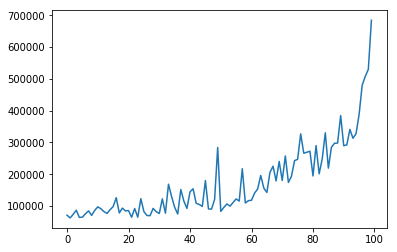

In [43]:
y_pred = reg_best.predict(X_test)
error_print(y_test, y_pred)